In [49]:
import json
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import bootstrap
from config import Dataset
from collections import defaultdict
import os

In [3]:
result_files = {
    Dataset.PROTEINS: "study_outputs/dataset-PROTEINS/results.json",
    Dataset.ENZYMES: "study_outputs/dataset-ENZYMES/results.json",
}

In [4]:
result_dict = {}
for ds, path in result_files.items():
    with open(path, "r") as f:
        result_dict[ds] = json.load(f)

In [61]:
def get_ci(data, confidence_level=0.95):
    res = bootstrap((data,), np.mean, confidence_level=confidence_level)
    statistic = (res.confidence_interval.low + res.confidence_interval.high) / 2
    error = (res.confidence_interval.high - res.confidence_interval.low) / 2
    return statistic, error

def get_stats(results, utility_fn: str):
    statistics = defaultdict(dict)

    for embedder, experiments in results["best_trials"].items():
        sizes = [exp["validation_results"][2] for exp in experiments[utility_fn]]
        statistics[embedder]["size"], statistics[embedder]["size_error"] = get_ci(sizes)

        # accuracies = results["accuracies"][embedder][optimize_fn]
        # statistics[embedder]["acc"], statistics[embedder]["acc_error"] = get_ci(sizes)
        statistics[embedder]["acc"] = results["results"][embedder][utility_fn]["accuracy"]
        statistics[embedder]["acc_error"] = results["results"][embedder][utility_fn]["error"]

    return statistics

formats = {
    "QFE-exp": "mo",
    "QFE-probs": "ro",
    "MLP-2^D": "bs",
    "MLP-D": "cs",
    "none": "kx"
}

def plot_stats(statistics, plot_file_name=None):
    fig, ax = plt.subplots()
    for embedder, embedder_stats in statistics.items():
        ax.errorbar(
            embedder_stats["size"],
            embedder_stats["acc"],
            xerr=embedder_stats["size_error"],
            yerr=embedder_stats["acc_error"],
            fmt=formats[embedder],
            label=embedder
        )
    ax.legend(loc="best")
    ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    # ax.set_xscale('log')
    ax.set_xlabel('Number of parameters')
    ax.set_ylabel('Accuracy')
    if plot_file_name:
        os.makedirs("./generated_images", exist_ok=True)
        fig.savefig(f"./generated_images/{plot_file_name}.svg", format="svg", dpi=1200)
    plt.show()

Dataset: PROTEINS, Utility Function: best_all
{
    "QFE-exp": {
        "size": 40085.8,
        "size_error": 33576.2,
        "acc": 0.6983395952005818,
        "acc_error": 0.0307518280612451
    },
    "QFE-probs": {
        "size": 40452.7,
        "size_error": 31115.699999999997,
        "acc": 0.6890962711590516,
        "acc_error": 0.031685048276976546
    },
    "MLP-2^D": {
        "size": 12307.5,
        "size_error": 10189.5,
        "acc": 0.6645982305175131,
        "acc_error": 0.032060760311881376
    },
    "MLP-D": {
        "size": 42604.1,
        "size_error": 35076.1,
        "acc": 0.6767563527653215,
        "acc_error": 0.04566921181270961
    },
    "none": {
        "size": 29781.19812901288,
        "size_error": 22422.398129012876,
        "acc": 0.7022179129802448,
        "acc_error": 0.03500181796145918
    }
}


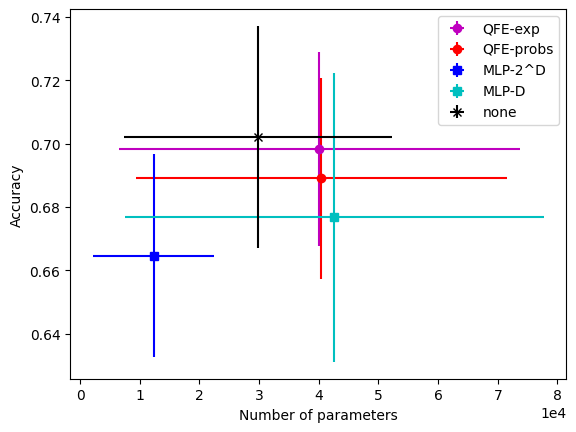

Dataset: PROTEINS, Utility Function: best_acc
{
    "QFE-exp": {
        "size": 238153.8,
        "size_error": 199791.0,
        "acc": 0.6805296327717851,
        "acc_error": 0.036874318264452755
    },
    "QFE-probs": {
        "size": 151754.9,
        "size_error": 116933.1,
        "acc": 0.6937320728800549,
        "acc_error": 0.027089645699511167
    },
    "MLP-2^D": {
        "size": 229919.2,
        "size_error": 125571.0,
        "acc": 0.6855249868702783,
        "acc_error": 0.027867329212620695
    },
    "MLP-D": {
        "size": 111659.87166071145,
        "size_error": 37951.07166071145,
        "acc": 0.7182947521512544,
        "acc_error": 0.022233668646224725
    },
    "none": {
        "size": 319101.5,
        "size_error": 214471.69999999998,
        "acc": 0.6819900618106896,
        "acc_error": 0.044588534723063955
    }
}


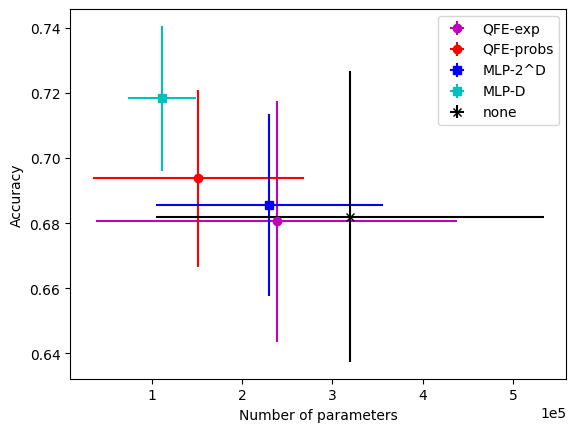

Dataset: PROTEINS, Utility Function: low_params
{
    "QFE-exp": {
        "size": 10022.8,
        "size_error": 6767.0,
        "acc": 0.6460146244899608,
        "acc_error": 0.034977578475336335
    },
    "QFE-probs": {
        "size": 5951.6,
        "size_error": 1360.0,
        "acc": 0.6597159940209267,
        "acc_error": 0.030572051872500228
    },
    "MLP-2^D": {
        "size": 3265.0,
        "size_error": 1513.3999999999999,
        "acc": 0.7036904617622106,
        "acc_error": 0.03739546721609499
    },
    "MLP-D": {
        "size": 8688.5,
        "size_error": 4224.9,
        "acc": 0.6741748474932331,
        "acc_error": 0.04577828950026264
    },
    "none": {
        "size": 10929.5,
        "size_error": 3897.1000000000004,
        "acc": 0.6745869187573224,
        "acc_error": 0.04617824102129037
    }
}


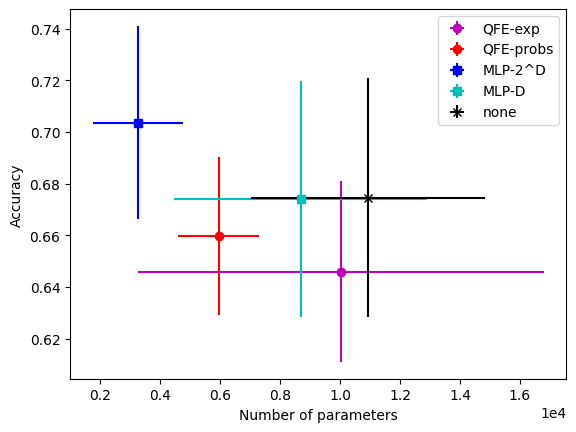

Dataset: ENZYMES, Utility Function: best_all
{
    "QFE-exp": {
        "size": 20305.51075016608,
        "size_error": 16271.510750166079,
        "acc": 0.25416666666666665,
        "acc_error": 0.024166666666666697
    },
    "QFE-probs": {
        "size": 40778.0,
        "size_error": 26804.0,
        "acc": 0.32666666666666666,
        "acc_error": 0.04999999999999999
    },
    "MLP-2^D": {
        "size": 46010.10283712354,
        "size_error": 43110.90283712354,
        "acc": 0.2808333333333333,
        "acc_error": 0.06750000000000002
    },
    "MLP-D": {
        "size": 21199.4,
        "size_error": 16268.6,
        "acc": 0.3341666666666667,
        "acc_error": 0.09416666666666665
    },
    "none": {
        "size": 17658.399999999998,
        "size_error": 11186.199999999999,
        "acc": 0.35500000000000004,
        "acc_error": 0.07000000000000006
    }
}


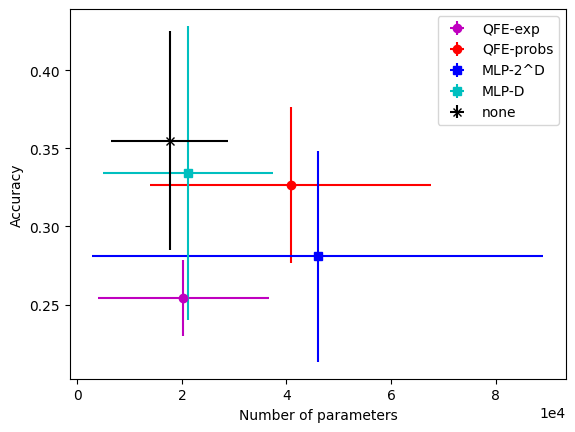

Dataset: ENZYMES, Utility Function: best_acc
{
    "QFE-exp": {
        "size": 121698.4,
        "size_error": 60832.399999999994,
        "acc": 0.23916666666666667,
        "acc_error": 0.049166666666666664
    },
    "QFE-probs": {
        "size": 293641.2,
        "size_error": 164986.8,
        "acc": 0.31,
        "acc_error": 0.043333333333333335
    },
    "MLP-2^D": {
        "size": 236330.2,
        "size_error": 138955.2,
        "acc": 0.31333333333333335,
        "acc_error": 0.046666666666666634
    },
    "MLP-D": {
        "size": 133788.6,
        "size_error": 67495.0,
        "acc": 0.3416666666666667,
        "acc_error": 0.061666666666666675
    },
    "none": {
        "size": 262257.9,
        "size_error": 113420.50000000001,
        "acc": 0.45166666666666666,
        "acc_error": 0.041666666666666685
    }
}


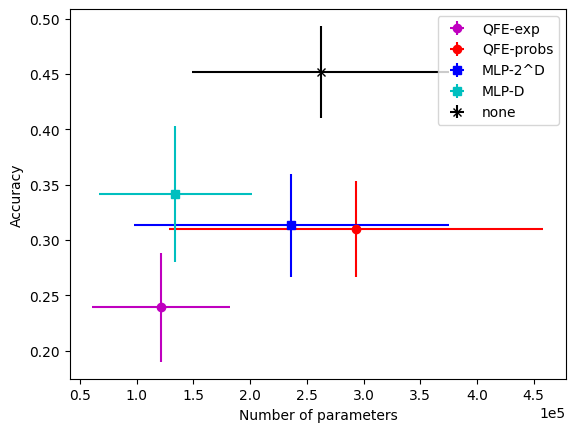

Dataset: ENZYMES, Utility Function: low_params
{
    "QFE-exp": {
        "size": 20988.5,
        "size_error": 15606.5,
        "acc": 0.2666666666666667,
        "acc_error": 0.02000000000000003
    },
    "QFE-probs": {
        "size": 34165.0,
        "size_error": 24404.4,
        "acc": 0.3025,
        "acc_error": 0.05083333333333334
    },
    "MLP-2^D": {
        "size": 48162.6,
        "size_error": 41982.200000000004,
        "acc": 0.3225,
        "acc_error": 0.07416666666666666
    },
    "MLP-D": {
        "size": 2613.006494994866,
        "size_error": 1216.593505005134,
        "acc": 0.3166666666666667,
        "acc_error": 0.07666666666666666
    },
    "none": {
        "size": 8083.5,
        "size_error": 3869.1000000000004,
        "acc": 0.3726886517077961,
        "acc_error": 0.036021985041129495
    }
}


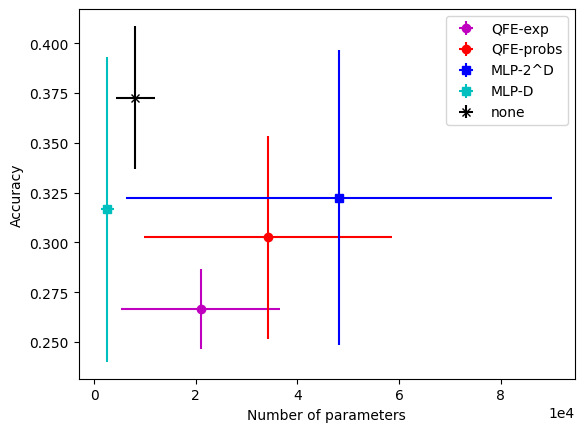

In [62]:
for ds, results in result_dict.items():
    for utility_fn in results["best_trials"]["MLP-2^D"].keys():
        stats = get_stats(results, utility_fn)
        print(f"Dataset: {ds}, Utility Function: {utility_fn}") 
        print(json.dumps(stats, indent=4))
        plot_stats(stats, plot_file_name=f"{ds.value}-{utility_fn}")

In [ ]:
mlp_d_xu_results = {
  Dataset.PROTEINS: [0.61, 0.65, 0.64],
  Dataset.ENZYMES: [0.14, 0.2, 0.18],
}

In [10]:
for op_fn, res in result_dict[Dataset.PROTEINS]["results"]["MLP-D"].items():
  print(op_fn, res["accuracy"], "\pm", res["error"], ", Lower Bound:", res["accuracy"]-res["error"])

best_all 0.6767563527653215 \pm 0.04566921181270961 , Lower Bound: 0.631087140952612
best_acc 0.7182947521512544 \pm 0.022233668646224725 , Lower Bound: 0.6960610835050296
low_params 0.6741748474932331 \pm 0.04577828950026264 , Lower Bound: 0.6283965579929705


In [11]:
for op_fn, res in result_dict[Dataset.ENZYMES]["results"]["MLP-D"].items():
  print(op_fn, res["accuracy"], "\pm", res["error"], ", Lower Bound:", res["accuracy"]-res["error"])

best_all 0.3341666666666667 \pm 0.09416666666666665 , Lower Bound: 0.24000000000000007
best_acc 0.3416666666666667 \pm 0.061666666666666675 , Lower Bound: 0.28
low_params 0.3166666666666667 \pm 0.07666666666666666 , Lower Bound: 0.24000000000000005


## Build LaTeX tables

Hyperparameters Table

In [30]:
from IPython.display import display, Latex
from collections import defaultdict

In [45]:
latex_col_names = {
    "pooling": "Pooling",
    "model": "MP Model",
    "qfe_layers": "QFE Layers",
    "layers": "MP Layers",
    "hidden": "MP Hidden Dimension",
    "dropout": "Dropout",
    "lr": "Learning Rate",
    "weight_decay": "Weight Decay",
}

latex_embedder_names = {
    "QFE-exp": "QFE-exp",
    "QFE-probs": "QFE-probs",
    "MLP-2^D": "MLP-$2^D$",
    "MLP-D": "MLP-$D$",
    "none": "None",
}

latex_col_settings = defaultdict(lambda: "l")
latex_col_settings["hidden"] = "p{3cm}"

In [46]:
utility_fn = "best_all"

latex_string = ""
# columns = result_dict[Dataset.PROTEINS]["best_trials"]["none"]["best_all"][0]["params"].keys()
columns = ["qfe_layers", "model", "layers", "hidden"]
latex_string += "\\begin{tabular}{| l | " + " ".join(latex_col_settings[c] for c in columns) + " |}\n"
latex_string += "\\hline\n"
latex_string += "\\textbf{Fold} & " + " & ".join(map(lambda c: f"\\textbf{{{latex_col_names[c]}}}", columns)) + " \\\\ \n"

for embedder in result_dict[Dataset.PROTEINS]["best_trials"]:

    trials = result_dict[Dataset.PROTEINS]["best_trials"][embedder][utility_fn]

    latex_string += "\\hline\n"
    latex_string += f"\\multicolumn{{{len(columns)+1}}}{{|c|}}{{{latex_embedder_names[embedder]}}} \\\\ \n"
    latex_string += "\\hline\n"

    for i, trial in enumerate(trials):
        params = {k: (f"{v:.2f}" if v > 0.01 else f"{v:.2e}") if type(v) == float else str(v) for k, v in trial["params"].items()}
        latex_string += f"{i} & " + " & ".join(map(lambda c: params[c], columns)) + " \\\\ \n"

latex_string += "\\hline\n"
latex_string += "\\end{tabular}"

print(latex_string)


\begin{tabular}{| l | l l l p{3cm} l l l |}
\hline
\textbf{Fold} & \textbf{Pooling} & \textbf{MP Model} & \textbf{MP Layers} & \textbf{MP Hidden Dimension} & \textbf{Dropout} & \textbf{Learning Rate} & \textbf{Weight Decay} \\ 
\hline
\multicolumn{8}{|c|}{QFE-exp} \\ 
\hline
0 & mean & GAT & 5 & 22 & 0.50 & 5.21e-03 & 1.20e-05 \\ 
1 & max & GCN & 5 & 115 & 0.16 & 8.33e-04 & 1.59e-05 \\ 
2 & sum & GAT & 2 & 183 & 0.02 & 5.38e-03 & 1.46e-05 \\ 
3 & max & GCN & 11 & 100 & 0.02 & 3.03e-04 & 6.88e-05 \\ 
4 & max & GAT & 5 & 54 & 0.29 & 3.72e-03 & 4.24e-05 \\ 
\hline
\multicolumn{8}{|c|}{QFE-probs} \\ 
\hline
0 & max & GCN & 5 & 73 & 0.41 & 4.26e-03 & 1.29e-04 \\ 
1 & mean & GAT & 9 & 109 & 0.34 & 2.15e-03 & 2.21e-05 \\ 
2 & max & GraphSAGE & 2 & 103 & 0.16 & 6.72e-03 & 6.90e-04 \\ 
3 & max & GraphConv & 2 & 184 & 0.26 & 1.30e-03 & 1.11e-05 \\ 
4 & mean & GCN & 5 & 152 & 0.15 & 2.20e-04 & 3.22e-04 \\ 
\hline
\multicolumn{8}{|c|}{MLP-$2^D$} \\ 
\hline
0 & max & GAT & 1 & 41 & 0.20 & 3.24e-03 